In [2]:
import pandas as pd
import numpy as np

In [5]:
# train_df = pd.read_csv("reviews_shuffled.txt", sep='\t', header=None)
# train_df1 = pd.read_csv("export_dataframe.csv", sep='\t', header=None)
# train_df1 = pd.read_csv("wiki_df.csv", sep='\t', header=None)
train_df = pd.read_csv("/home/ubuntu/Downloads/amazonreviews/train.ft.txt", sep='\t',header=None)
test_df = pd.read_csv("/home/ubuntu/Downloads/amazonreviews/test.ft.txt", sep='\t')

In [6]:
# label=[x[-1:] for x in train_df[0]]
# data = [x for x in train_df1[0]]
s = train_df[0]
test_s = test_df['test data']

test = [test_s[y] for y in range(0, 3000)]
train = [s[x] for x in range(0, 10000)]


In [15]:
train_x = [x[11:] for x in train]
train_y = [y[:10] for y in train]

test_x = [i[11:] for i in test]
test_y = [j[:10] for j in test]

In [22]:
test_y[0][9:]

'2'

In [23]:
train_ys  = [x[9:] for x in train_y ]
test_ys  = [y[9:] for y in test_y ]

In [25]:
from string import punctuation
# all_text = '\n'.join([c for c in data if c not in punctuation])
traindata_x = [c for c in train_x if c not in punctuation]

In [27]:
print(traindata_x[0])

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


In [28]:
# for i in range(10):
#     print(label[i], data[i])

In [5]:
from string import punctuation
# all_text = '\n'.join([c for c in data if c not in punctuation])
reviews_split = [c for c in data if c not in punctuation]
print(len(reviews_split))
print(len(label))

10662
10662


In [29]:
from collections import Counter

all_text2 = ' '.join(traindata_x)
# Count all the words using Counter Method
words = all_text2.split()
count_words = Counter(words)

total_words = len(words)
# sorted_words = count_words.most_common(total_words)

VOCAB_SIZE = 5000
sorted_words = count_words.most_common(VOCAB_SIZE)
print(sorted_words[:10])

[('the', 34865), ('and', 20426), ('a', 18998), ('I', 18811), ('to', 18760), ('of', 16487), ('is', 14061), ('this', 11039), ('it', 10789), ('in', 9077)]


In [30]:
vocab_to_int = {w:i+2 for i, (w,c) in enumerate(sorted_words)}
# print(vocab_to_int)

In [31]:
len(vocab_to_int)

5000

In [33]:
print(len(traindata_x))
print(type(traindata_x[0]))

10000
<class 'str'>


In [35]:
reviews_int = []
for review in traindata_x:
    r = [vocab_to_int[w] if w in vocab_to_int else 1 for w in review.split()] # unk -> 1
    reviews_int.append(r)
print(traindata_x[0])
print(traindata_x[0])

Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


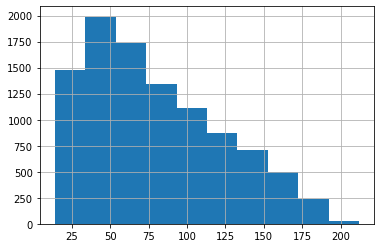

count    10000.000000
mean        79.553200
std         43.023095
min         14.000000
25%         43.000000
50%         71.000000
75%        109.000000
max        212.000000
dtype: float64

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [38]:
#Removing Outliers — Getting rid of extremely long or short reviews
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = np.array([ train_ys[i] for i, l in enumerate(reviews_len) if l> 0 ], dtype='i')

In [39]:
print(len(encoded_labels))
print(len(reviews_int))

10000
10000


In [40]:
# Padding / Truncating the remaining data

seq_length=50
''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
'''
features = np.zeros((len(reviews_int), seq_length), dtype = int)

for i, review in enumerate(reviews_int):
    review_len = len(review)

    if review_len <= seq_length:
        zeroes = list(np.zeros(seq_length-review_len))
        new = review + zeroes
    elif review_len > seq_length:
        new = review[0:seq_length]

    features[i,:] = np.array(new)

In [41]:
#Training, Validation, Test Dataset Split
split_frac = 0.8
len_feat = len(features)

train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]

remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]

valid_x = remaining_x[0:int(len(remaining_x)*1)]
valid_y = remaining_y[0:int(len(remaining_y)*1)]


In [42]:
print(train_x.shape, train_y.shape)
print(valid_x.shape, valid_y.shape)
print(test_x.shape, test_y.shape)

print(type(train_x), type(train_y))
print(type(valid_x), type(valid_y))
print(type(test_x), type(test_y))

(8000, 50) (8000,)
(2000, 50) (2000,)


AttributeError: 'list' object has no attribute 'shape'

In [43]:
train_x

array([[   1,   72,   12, ...,  133,  496,   10],
       [  19,  120, 1356, ...,   81,  614,    6],
       [   1,   27, 1356, ...,    6,   52, 1510],
       ...,
       [1787,   17,   50, ..., 1380,    1, 1305],
       [  25,    1, 3887, ...,    0,    0,    0],
       [   1,    1,    1, ...,   23,    1,    0]])

### Keras.io Sequential training

In [44]:
import tensorflow as tf
# import tensorflow.keras.functional as F
from tensorflow import keras
from tensorflow.keras import layers

/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [45]:
use_dropout = False
HIDDEN_SIZE = 500
BATCH_SIZE  = 512
EPOCHS      = 5

model = keras.Sequential()
model.add(layers.Embedding(VOCAB_SIZE + 2,  # words + padding + unknown
                           HIDDEN_SIZE // 2, 
                           input_length=seq_length))
model.add(layers.LSTM(HIDDEN_SIZE, return_sequences=True))
model.add(layers.LSTM(HIDDEN_SIZE // 2))# , return_sequences=True))
model.add(layers.Dense(1, activation="softmax"))

# prediction output : [0, 1]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



* optimizer: 
    * SGD -> RMSProp -> Adam

* loss:
    * Mean Squared Error
    * Binary Cross-Entropy



In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_crossentropy', 'accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 250)           1250500   
_________________________________________________________________
lstm (LSTM)                  (None, 50, 500)           1502000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 250)               751000    
_________________________________________________________________
dense (Dense)                (None, 1)                 251       
Total params: 3,503,751
Trainable params: 3,503,751
Non-trainable params: 0
_________________________________________________________________


In [47]:
# model_saver = keras.callbacks.ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5')
hist = model.fit(train_x, train_y, 
              batch_size=BATCH_SIZE, 
              epochs=EPOCHS, 
#               callbacks=[model_saver], 
              validation_data=(valid_x, valid_y))

Train on 8000 samples, validate on 2000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
8000/8000 [==============================] - 45s 6ms/sample - loss: -7.4807 - binary_crossentropy: -7.4807 - acc: 0.5121 - val_loss: -7.6666 - val_binary_crossentropy: -7.6666 - val_acc: 0.5000
Epoch 2/5
8000/8000 [==============================] - 45s 6ms/sample - loss: -7.4807 - binary_crossentropy: -7.4807 - acc: 0.5121 - val_loss: -7.6666 - val_binary_crossentropy: -7.6666 - val_acc: 0.5000
Epoch 3/5
8000/8000 [==============================] - 48s 6ms/sample - loss: -7.4807 - binary_crossentropy: -7.4807 - acc: 0.5121 - val_loss: -7.6666 - val_binary_crossentropy: -7.6666 - val_acc: 0.5000
Epoch 4/5
8000/8000 [==============================] - 49s 6ms/sample - loss: -7.4807 - binary_crossentropy: -7.4807 - acc: 0.5121 - val_loss: -7.6666 - val_binary_crossentropy: -7.6666 - val_acc: 0.5000
Epoch 5/5
8000/8000 [=====================